# **Part 1 (50 points)**

**In this part you will implement a neural network from scratch. You cannot use any existing Deep Learning Framework. You can utilize NumPy and Pandas libraries to perform efficient calculations. Refer to Lecture 5 slides for details on computations required.**

Write a Class called NeuralNetwork that has at least the following methods (you are free to add
your own methods too):

* a. Initialization method.
* b. Forward propagation method that performs forward propagation calculations.
* c. Backward propagation method that implements the backpropagation algorithm
discussed in class.
* d. Train method that includes the code for gradient descent.
* e. Cost method that calculates the loss function.
* f. Predict method that calculates the predictions for the test set.

Test your NeuralNetwork Class with the dataset you selected. If the dataset is big, you may notice inefficiencies in runtime. Try incorporating different versions of gradient descent to improve that (Minibatch, Stochastic etc.). You may choose to use only a subset of your data for this task (or any other technique). Explain which technique you followed and why.

In [26]:
import numpy as np
import pandas as pd

In [27]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.biases_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.biases_hidden_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Clip the input values to prevent overflow or underflow
        clipped_x = np.clip(x, -500, 500)  # Adjust the clipping range as needed

        # Compute the sigmoid function with clipped input values
        return 1 / (1 + np.exp(-clipped_x))

    def forward_propagation(self, X):
        # Forward propagation through the network
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.biases_input_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.biases_hidden_output
        self.output_layer_output = self.sigmoid(self.output_layer_input)
        return self.output_layer_output

    def backward_propagation(self, X, y, output, learning_rate):
        # Backward propagation through the network
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        self.hidden_error = self.output_delta.dot(self.weights_hidden_output.T)
        self.hidden_delta = self.hidden_error * self.sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(self.output_delta) * learning_rate
        self.biases_hidden_output += np.sum(self.output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(self.hidden_delta) * learning_rate
        self.biases_input_hidden += np.sum(self.hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward_propagation(X)
            self.backward_propagation(X, y, output, learning_rate)
            print(f"epoch::{epoch}")

    def cost(self, X, y):
        output = self.forward_propagation(X)
        return np.mean(np.square(y - output))

    def predict(self, X):
        return np.round(self.forward_propagation(X))

In [40]:
from PIL import Image
# Load dataset
df = pd.read_csv("../Projects_ML_AI/project5/train.csv")
df

,filepath,team_name,team
0,../input/english-premier-league-logo-detection...,manchester-united,12
1,../input/english-premier-league-logo-detection...,manchester-united,12
2,../input/english-premier-league-logo-detection...,manchester-united,12
3,../input/english-premier-league-logo-detection...,manchester-united,12
4,../input/english-premier-league-logo-detection...,manchester-united,12
...,...,...,...
19995,../input/english-premier-league-logo-detection...,brentford,2
19996,../input/english-premier-league-logo-detection...,brentford,2
19997,../input/english-premier-league-logo-detection...,brentford,2
19998,../input/english-premier-league-logo-detection...,brentford,2


In [42]:
# Replace part of file paths in the 'filepath' column
prefix = '../input/english-premier-league-logo-detection-20k-images'
path = '../Projects_ML_AI/project3'
df['filepath'] = df['filepath'].str.replace(prefix, path)
df

,filepath,team_name,team
0,../Projects_ML_AI/project3/epl-logos-big/epl-l...,manchester-united,12
1,../Projects_ML_AI/project3/epl-logos-big/epl-l...,manchester-united,12
2,../Projects_ML_AI/project3/epl-logos-big/epl-l...,manchester-united,12
3,../Projects_ML_AI/project3/epl-logos-big/epl-l...,manchester-united,12
4,../Projects_ML_AI/project3/epl-logos-big/epl-l...,manchester-united,12
...,...,...,...
19995,../Projects_ML_AI/project3/epl-logos-big/epl-l...,brentford,2
19996,../Projects_ML_AI/project3/epl-logos-big/epl-l...,brentford,2
19997,../Projects_ML_AI/project3/epl-logos-big/epl-l...,brentford,2
19998,../Projects_ML_AI/project3/epl-logos-big/epl-l...,brentford,2


In [43]:
widths = []
heights = []
for i in df['filepath']:
    im = Image.open(i)
    w,h = im.size
    widths.append(w)
    heights.append(h)
print(f"sizes avg = ({sum(widths)//len(widths)},{sum(heights)//len(heights)})")

sizes avg = (135,135)


In [1]:
# Preprocess dataset
target_size = (135,135)
batch_size = 32
SEED = 42

In [45]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train:: {X_train}")

X_train:: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01176471 0.2745098  0.58039216 ... 0.         0.         0.        ]
 [0.39607843 0.63529412 0.83137255 ... 0.74117647 0.93333333 1.        ]
 ...
 [0.         0.37254902 0.66666667 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.45882353 0.10588235 0.19215686 ... 0.         0.         0.        ]]


In [46]:
# Initialize Neural Network
input_size = X_train.shape[1]
hidden_size = 64  # Example hidden layer size
output_size = len(np.unique(y_train))
nn = NeuralNetwork(input_size, hidden_size, output_size)
print(f"nn:: {nn}")

nn:: <__main__.NeuralNetwork object at 0x7fa4cbe69a90>


In [47]:
# Convert labels to one-hot encoded format
def one_hot_encode(labels, num_classes):
    num_labels = len(labels)
    one_hot_encoded = np.zeros((num_labels, num_classes))
    one_hot_encoded[np.arange(num_labels), labels] = 1
    return one_hot_encoded

y_train_encoded = one_hot_encode(y_train, output_size)
print(f"y_train_encoded:: {y_train_encoded}")
y_test_encoded = one_hot_encode(y_test, output_size)
print(f"y_test_encoded:: {y_train_encoded}")

y_train_encoded:: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
y_test_encoded:: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [48]:
# Train Neural Network
epochs = 5
learning_rate = 0.1
nn.train(X_train, y_train_encoded, epochs, learning_rate)

/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


epoch::0
epoch::1
epoch::2
epoch::3
epoch::4


In [49]:
# Evaluate Neural Network
train_loss = nn.cost(X_train, y_train_encoded)
test_loss = nn.cost(X_test, y_test_encoded)
print("Training Loss:", train_loss)
print("Test Loss:", test_loss)

# Make predictions
predictions = nn.predict(X_test)
print(predictions)

# Evaluate accuracy
def accuracy(predictions, true_labels):
    predicted_labels = np.argmax(predictions, axis=1)
    correct = np.sum(predictions == true_labels)
    total = len(true_labels)
    accuracy = correct / total
    return accuracy

# Calculate accuracy on test set
test_accuracy = accuracy(predictions, y_test_encoded)
print("Test Accuracy:", test_accuracy)

/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Training Loss: 0.09496249999979786
Test Loss: 0.09514999999979745
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test Accuracy: 18.097


# **Part 2 (50 points)**

**In this part you will implement a 2-layer neural network using any Deep Learning Framework
(e.g., TensorFlow, PyTorch etc.).**

You should pick a Deep Learning Framework that you would like to use to implement your 2-
layer Neural Network.

**Task 1 (5 points):** 
Assuming you are not familiar with the framework, in this part of the
homework you will present your research describing the resources you used to learn the
framework (must include links to all resources). Clearly explain why you needed a particular
resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.)

**Task 2 (35 points):** 
Once you have figured out the resources you need for the project, you
should design and implement your project. The project must include the following steps (it’s
not limited to these steps):
1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
2. Perform a train-dev-test split.
3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).
4. Compute the final cost function.
5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization. Experiment with normalized inputs i.e. comment on how
your model performs when the inputs are normalized.
6. Present the results using the test set.


NOTE: In this step, once you have implemented your 2-layer network you may increase and/or
decrease the number of layers as part of the hyperparameter tuning process.

**Exploratory Data Analysis (EDA)**

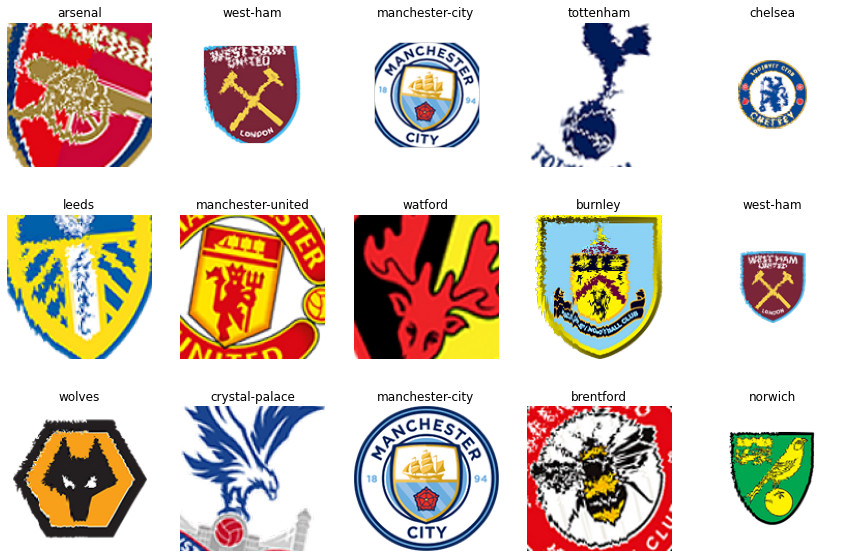

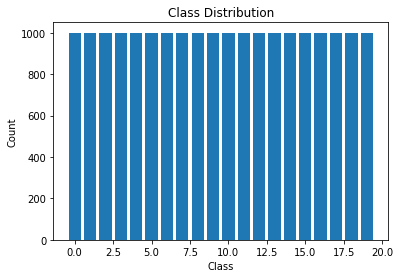

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

# Load the dataset
df = pd.read_csv("../Projects_ML_AI/project3/train.csv")

# Replace part of file paths in the 'filepath' column
prefix = '../input/english-premier-league-logo-detection-20k-images'
path = '../Projects_ML_AI/project3'
df['filepath'] = df['filepath'].str.replace(prefix, path)

# Display some samples
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
for i in range(3):
    for j in range(5):
        idx = np.random.randint(len(df))
        img = plt.imread(df.iloc[idx]["filepath"])
        axs[i, j].imshow(img)
        axs[i, j].set_title(df.iloc[idx]["team_name"])
        axs[i, j].axis("off")

plt.show()

# Check class distribution
class_counts = df["team"].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


In [52]:
from sklearn.model_selection import train_test_split

# Split the dataset into train-dev-test sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["team"], random_state=42)
train_df, dev_df = train_test_split(train_df, test_size=0.1, stratify=train_df["team"], random_state=42)

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor before passing it to the linear layer
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Define hyperparameters
input_size = 135 * 135 * 3  # Image size: 135x135 pixels with 3 channels (RGB)
hidden_size = 128
output_size = 20  # Number of classes

# Create the model
model = NeuralNetwork(input_size, hidden_size, output_size)

In [60]:
criterion = nn.CrossEntropyLoss()

In [61]:
# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Normalize inputs
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

In [62]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['filepath']
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = self.df.iloc[idx]['team']
        return image, label

# Define the dataset and data loader
train_dataset = CustomDataset(train_df, transform=transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    normalize,
]))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
print(f"train_loader ===> {train_loader}")

train_loader ===> <torch.utils.data.dataloader.DataLoader object at 0x7fa7890bbc88>


In [63]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x196608 and 54675x128)

In [ ]:
# Evaluation loop
test_loader = DataLoader(train_dataset, batch_size=32, shuffle=False, num_workers=4)

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.size(0), -1)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

**Task 3 (10 points):** In task 2 describe how you selected the hyperparameters. What was the
rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use
an optimization algorithm? Why or why not?